# Challenge: QOSF
### Team # 32
### Team Members
- Ayelen Perez | Argentina
- Jefferson Granizo | Ecuador
- Jesus Montemayor | Perú
- Rubén Guzman | México
- Andres Diaz | Puerto Rico

In [ ]:
!pip install qiskit[all]
!pip install qiskit-aer
!pip install qiskit-ignis

Elige una opción:
1. Mostrar Matriz 1
2. Mostrar Matriz 2
3. Salir
Ingresa el número de la opción: 2
X O O
X - -
- - -
Ingresa la posición que desea utilizar 'O' (4,5,6,7,8): 5
['X', 'O', 'O']
['X', '-', 'O']
['-', '-', '-']


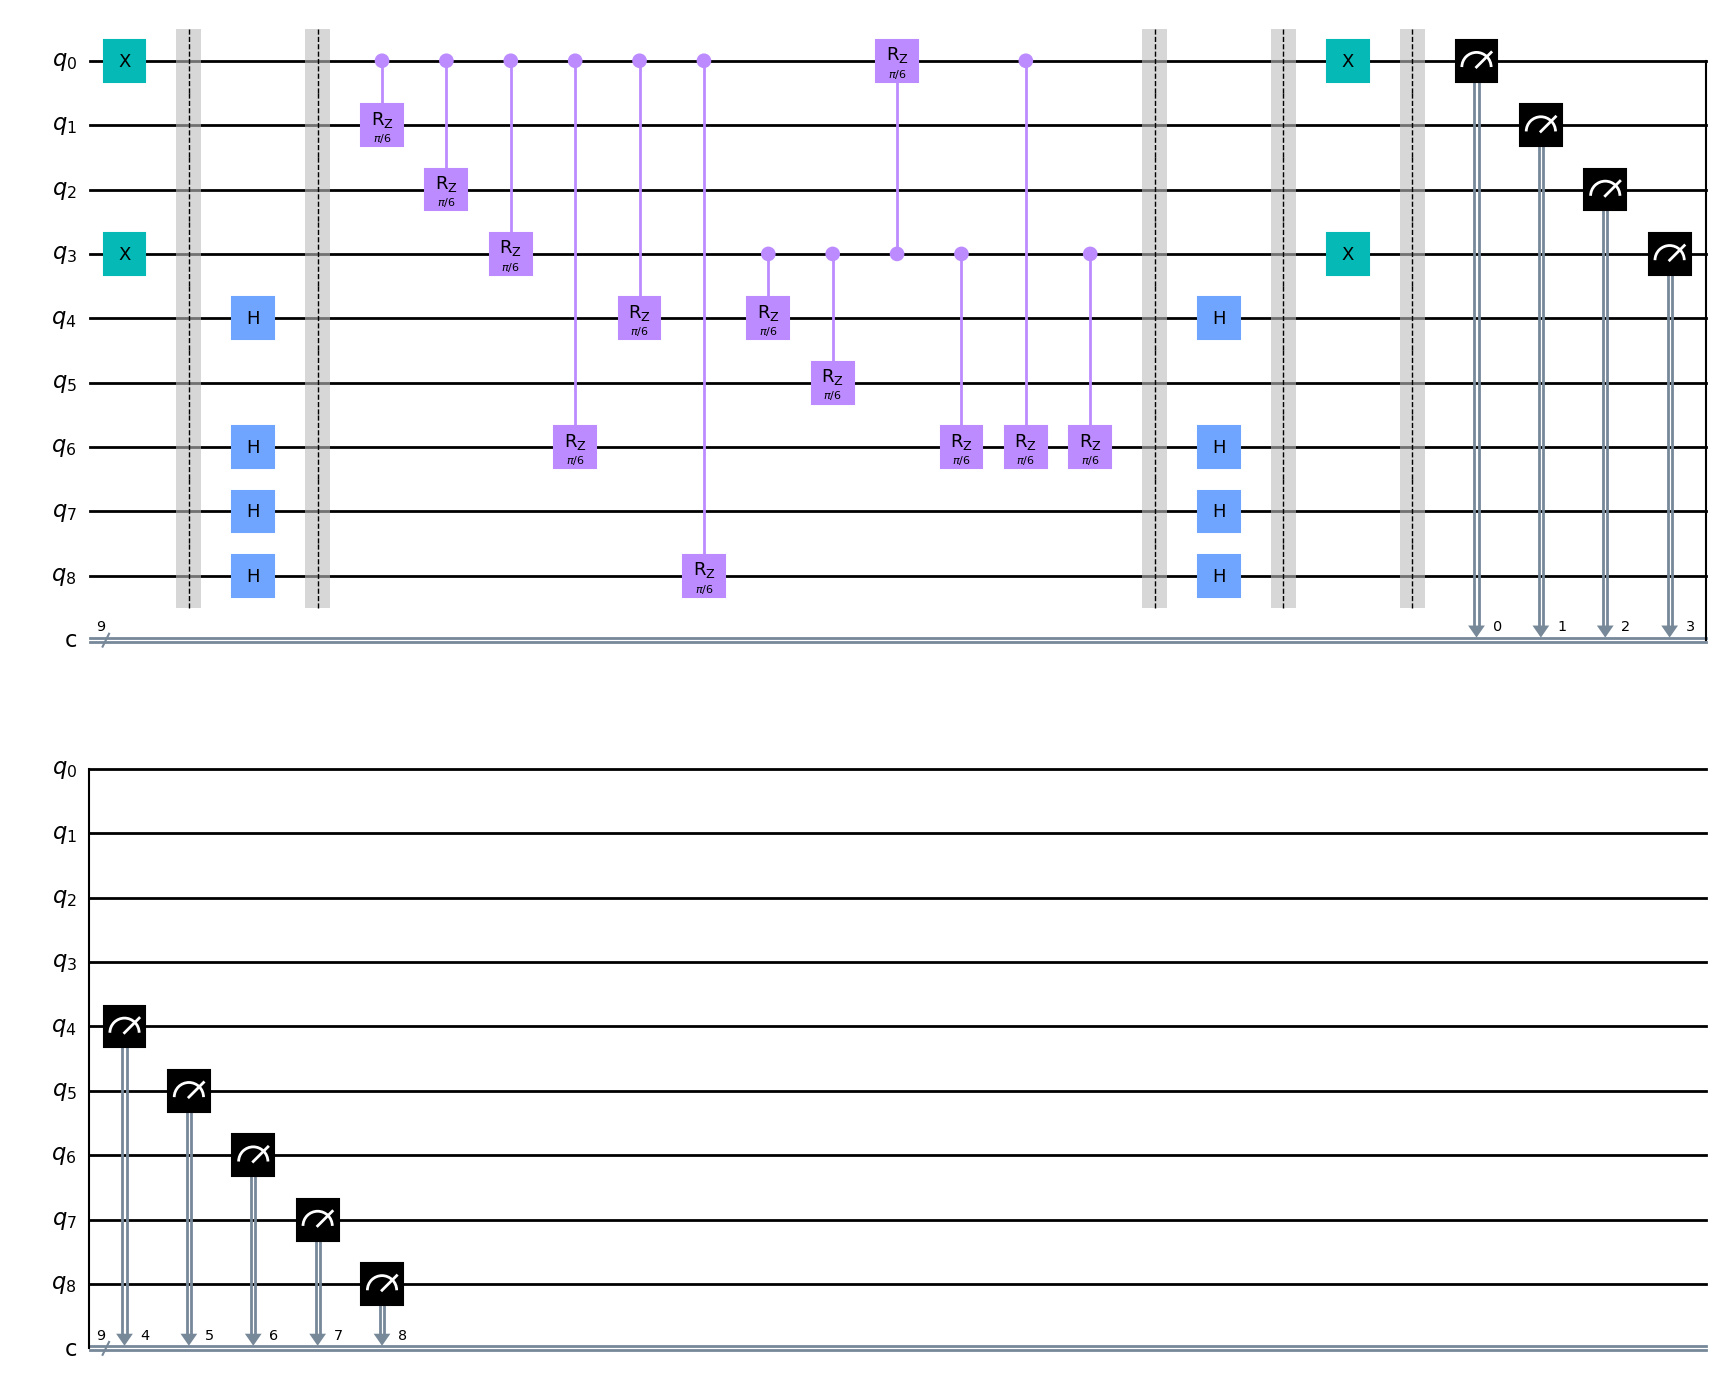

El movimiento optimo será 6
['X', 'O', 'O']
['X', '-', 'O']
['X', '-', '-']


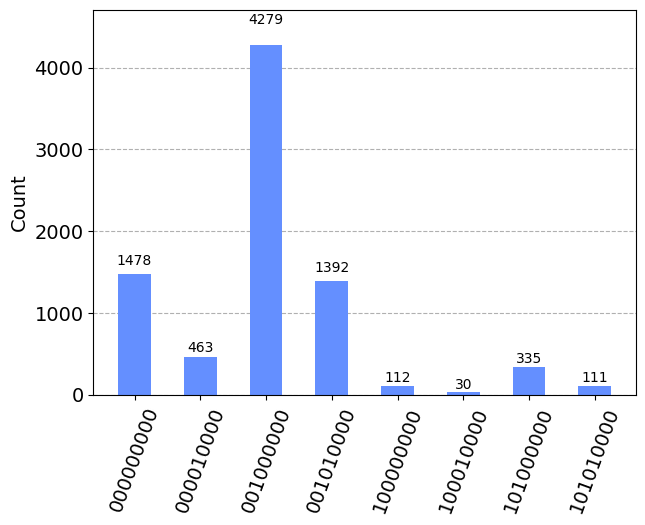

In [ ]:
from os import read
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, transpile, assemble
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
import random
import math

posicion_f_X = None
posicion_c_X = None
posicion_diagonal_X = None
posicion_diagonal_secundaria_X = None

celdas = [0, 1, 2, 3, 4, 5, 6, 7, 8]
numeros_de_celda_X = []
numeros_de_celda_O = []


pi = math.pi
n=0

qr = QuantumRegister(9,'q')
cr = ClassicalRegister(9,'c')

qc = QuantumCircuit(qr,cr)

matriz_1 = [
    ['X', 'O', 'O'],
    ['X', '-', '-'],
    ['O', '-', '-']
]

# Matriz 2
matriz_2 = [
    ['X', 'O', 'O'],
    ['X', '-', '-'],
    ['-', '-', '-']
]

while True:
    numeros_de_celda_X = []
    numeros_de_celda_O = []
    print("Elige una opción:")
    print("1. Mostrar Matriz 1")
    print("2. Mostrar Matriz 2")
    print("3. Salir")

    opcion = input("Ingresa el número de la opción: ")

    if opcion == '1':
        for fila in matriz_1:
            print(' '.join(fila))
            tablero = matriz_1
    elif opcion == '2':
        for fila in matriz_2:
            print(' '.join(fila))
            tablero = matriz_2

        ps = input("Ingresa la posición que desea utilizar 'O' (4,5,6,7,8): ")
        ps = int(ps)

    elif opcion == '3':
        break
    else:
        print("Opción no válida. Por favor, elige 1, 2 o 3.")

    fila = ps // len(tablero)
    columna = ps % len(tablero[0])

    # Reemplazar el valor en la posición con 'X'
    tablero[fila][columna] = 'O'

    for fila in tablero:
        print(fila)

    for fila_idx, fila in enumerate(tablero):
        for columna_idx, valor in enumerate(fila):
            if valor == 'X':
                numero_de_celda = fila_idx * 3 + columna_idx
                numeros_de_celda_X.append(numero_de_celda)

    for fila_ido, fila in enumerate(tablero):
        for columna_ido, valor in enumerate(fila):
            if valor == 'O':
                numero_de_celda = fila_ido * 3 + columna_ido
                numeros_de_celda_O.append(numero_de_celda)

    for i in numeros_de_celda_X:
        qc.x(i)

    qc.barrier()

    index = list(set(numeros_de_celda_X + numeros_de_celda_O))
    index_set = set(index)
    celdas_set = set(celdas)
    resultado = list(index_set.symmetric_difference(celdas_set))

    for i in resultado:
        qc.h(i)
        n = n+1

    qc.barrier()

    angle=pi/(1.5*n)

    for ind in numeros_de_celda_X:
        fila = ind // 3
        columna = ind % 3
        elementos_fila = [fila * 3 + i for i in range(3)]
        elementos_columna = [i * 3 + columna for i in range(3)]
        if fila == columna:
            elementos_diagonal_principal = [i * 3 + i for i in range(3)]
        else:
            elementos_diagonal_principal = []
        if fila + columna == 2:
            elementos_diagonal_secundaria = [i * 3 + (2 - i) for i in range(3)]
        else:
            elementos_diagonal_secundaria = []
        todas_las_listas = elementos_fila + elementos_columna + elementos_diagonal_principal + elementos_diagonal_secundaria

        for j in todas_las_listas:
            if ind != j:  # Asegurarse de que ind y j no sean iguales
                qc.crz(angle, ind, j)




    for columna in range(len(tablero[0])):
        elementos_columna = [tablero[fila][columna] for fila in range(len(tablero))]
        count_X = elementos_columna.count('X')

        if count_X == 2:
            for fila, elemento in enumerate(elementos_columna):
                if elemento == '-':
                    posicion_c_X = fila * len(tablero[0]) + columna
                    break
    if posicion_c_X is not None:
        for i in numeros_de_celda_X:
            qc.crz(angle, i, posicion_c_X)


    for fila in range(len(tablero)):

        count_X = tablero[fila].count('X')

        if count_X == 2:
            for columna, elemento in enumerate(tablero[fila]):
                if elemento == '-':
                    posicion_f_X = fila * len(tablero[0]) + columna
                    break

        if posicion_f_X is not None:
            for i in numeros_de_celda_X:
                qc.crz(angle, i, posicion_f_X)



    qc.barrier()
    for i in resultado:
        qc.h(i)

    qc.barrier()

    for i in numeros_de_celda_X:
        qc.x(i)

    qc.barrier()

    qc.measure(qr,cr)
    break
display(qc.draw(output="mpl"))
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=8200)
result = job.result()
counts = result.get_counts()

sorted_results = sorted(counts, key=counts.get, reverse=True)

if sorted_results[0] == '0' * len(sorted_results[0]):
    if len(sorted_results) > 1:
        max_result = sorted_results[1]
else:
    max_result = sorted_results[0]
position = max_result.rfind('1')
position = position - 8
if position < 0:
  position = position * -1
print("El movimiento optimo será",position)

fila = position // len(tablero)
columna = position % len(tablero[0])

# Reemplazar el valor en la posición con 'X'
tablero[fila][columna] = 'X'

for fila in tablero:
    print(fila)

plot_histogram(counts)